In [ ]:
#importing the libraries 
import numpy as np # linear algebra
import pandas as pd # data processing with CSV 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

Imported all the required packages that we may need.

Uploading the Bank Management Data set 

Input variables:

Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

So there are total 21 columns and 41188 rows(data entries) in the choosen dataset.

In [ ]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv("/content/drive/MyDrive/bank-additional-full.csv", sep = ";")


data.name = "data"
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


What are the data types? (Only numeric and categorical)

In [ ]:
#Data types of the columns present in the DataSet
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

We can see from above that out of the 21 columns present in the dataset, there are 10 Numerical datatypes and 11 Categorical ones.

Numerical/Quantitative DataTypes:
Numerical data refers to the data that is in the form of numbers, and not in any language or descriptive form.
ex:
age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed       

Categorical/Qualitative DataTypes:
Categorical data refers to a data type that can be stored and identified based on the names or labels given to them.
ex:
job,marital,education,default,housing,loan,poutcome,contact,month,day_of_week,y                  

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Using Describe helps us to understand the data in much better sense, we can now see the range, means, standard deviations, max-min and percentiles of the data, which helps us make better sense of the data.

As we can see from above that the data ranges of the columns are vastly different (ie: nr.employed mean 5167.035911 and emp.var.rate mean 0.081886). So to mprove the quality of our data we need to normalize it.

In [ ]:
data.count()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64

Are there missing values?

In [ ]:
# We need to check missing values in dataset
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# We need to check missing values in dataset
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

isnull():
This function takes a scalar or array-like object and indicates whether values are missing. And we can see that there are no Null values in our dataset.



In [ ]:
# To check duplicated values 
print(data.duplicated().value_counts()) 

False    41176
True        12
dtype: int64


Checking for duplicate values and droping them.

In [ ]:
data = data.drop_duplicates()

In [ ]:
# To check duplicated values 
print(data.duplicated().value_counts()) 

False    41176
dtype: int64


In [ ]:
# Lets count numbers of row for 'y' type
data.groupby("y").size()

y
no     36537
yes     4639
dtype: int64

In [ ]:
data['y'].value_counts()/data.shape[0]

no     0.887337
yes    0.112663
Name: y, dtype: float64

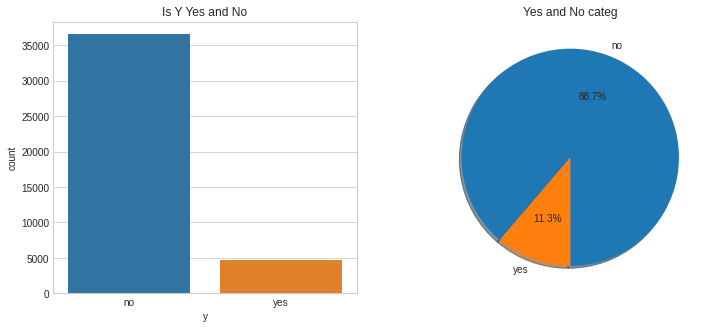

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='y',data=data)
plt.title("Is Y Yes and No")
plt.subplot(1,2,2)
labels =data['y'].value_counts(sort = True).index
sizes = data['y'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Yes and No categ',size = 12)
plt.show()


What are the likely distributions of the numeric variables?

From below we can observe the likely distributions of all the numeric variables.

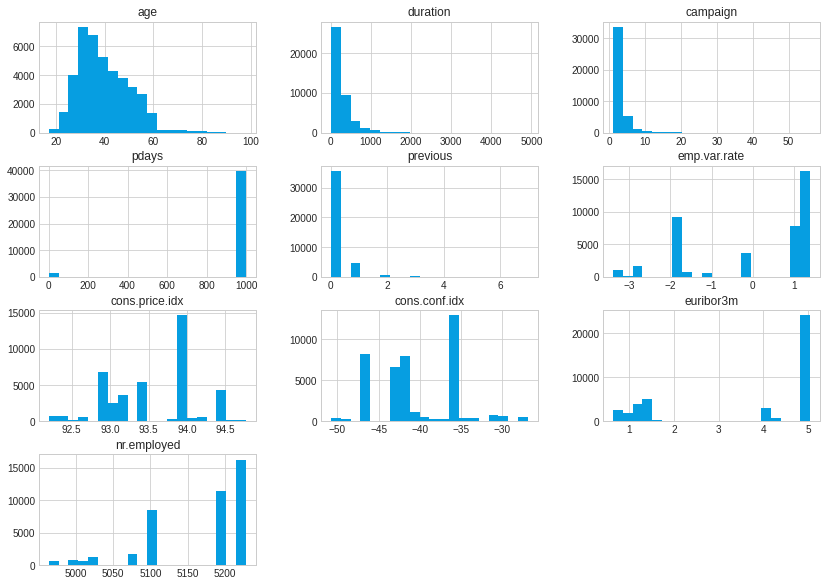

In [ ]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

<Figure size 576x360 with 0 Axes>

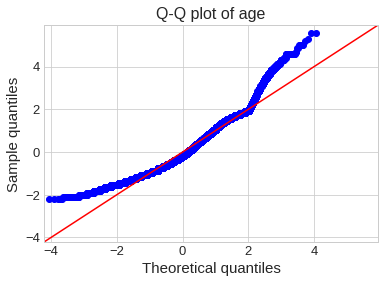

<Figure size 576x360 with 0 Axes>

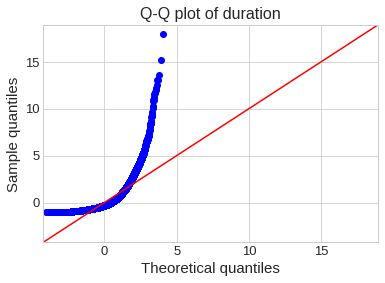

<Figure size 576x360 with 0 Axes>

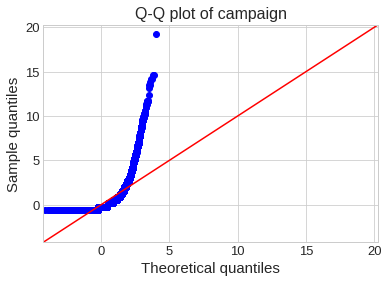

<Figure size 576x360 with 0 Axes>

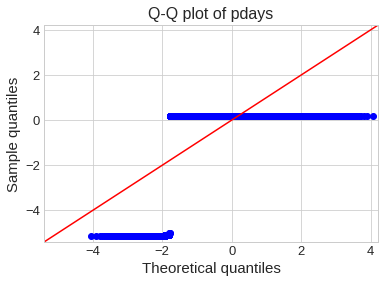

<Figure size 576x360 with 0 Axes>

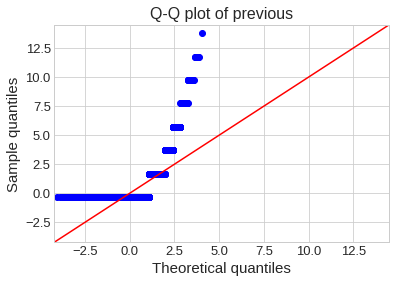

<Figure size 576x360 with 0 Axes>

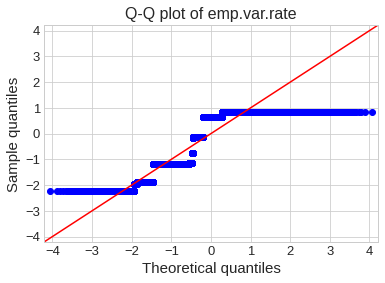

<Figure size 576x360 with 0 Axes>

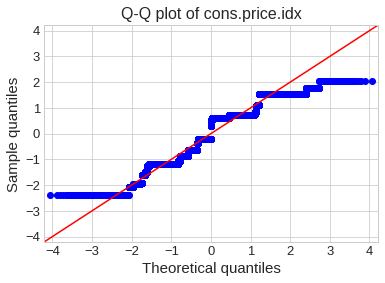

<Figure size 576x360 with 0 Axes>

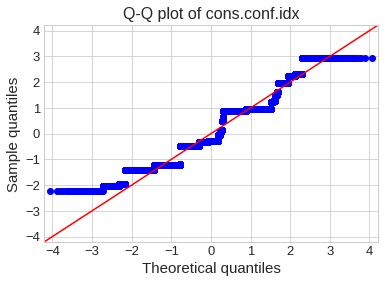

<Figure size 576x360 with 0 Axes>

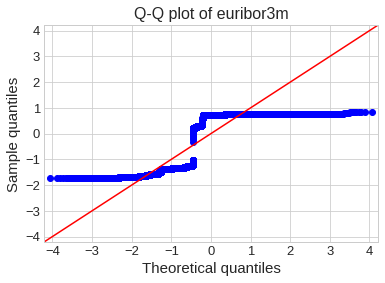

<Figure size 576x360 with 0 Axes>

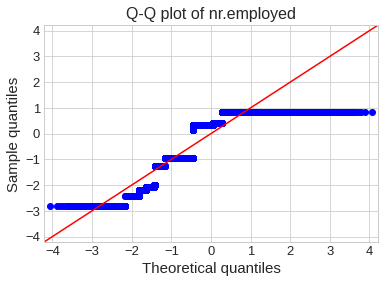

In [ ]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx',
                'cons.conf.idx','euribor3m','nr.employed']]


for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

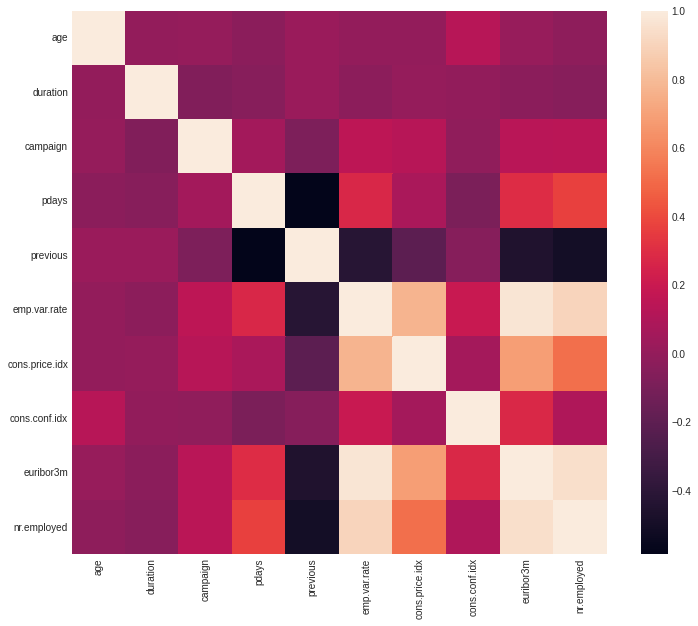

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor)
plt.show()

In [ ]:
#Normalizing all the values present in the dataset.(Categorical values as well.)

data = pd.get_dummies(data)


#from sklearn import preprocessing
#import pandas as pd
#d = preprocessing.normalize(data)
#scaled_data = pd.DataFrame(d, columns=data.columns)
#scaled_data.head()

In [ ]:

# Normalizing the data in the columns beacuse some values are too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats

x = data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] = pd.DataFrame(x_scaled)

In [ ]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,1,0,0,0,0,1,0,1,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,1,0,0,0,0,1,0,1,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,1,0,0,0,0,1,0,1,0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,1,0,0,0,0,1,0,1,0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
count,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,...,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,0.284234,0.052523,0.028510,0.963418,0.024720,0.725408,0.535766,0.430832,0.677238,0.769126,...,0.190062,0.206722,0.209297,0.196377,0.197542,0.103264,0.863391,0.033345,0.887337,0.112663
std,0.128657,0.052723,0.050376,0.187150,0.070716,0.327251,0.225580,0.193620,0.393205,0.273161,...,0.392355,0.404960,0.406812,0.397261,0.398150,0.304307,0.343438,0.179537,0.316184,0.316184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.020740,0.000000,1.000000,0.000000,0.333333,0.340608,0.338912,0.160961,0.512287,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.259259,0.036600,0.018182,1.000000,0.000000,0.937500,0.603274,0.376569,0.957379,0.859735,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.370370,0.064864,0.036364,1.000000,0.000000,1.000000,0.698753,0.602510,0.980957,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


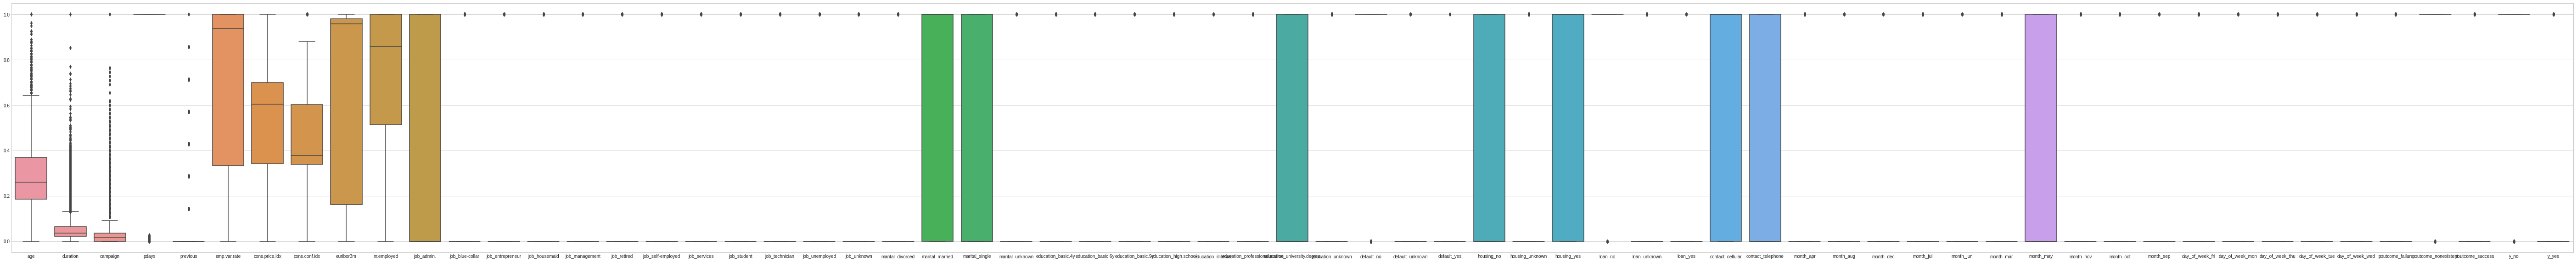

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(100,10))
sns.boxplot(data=data)

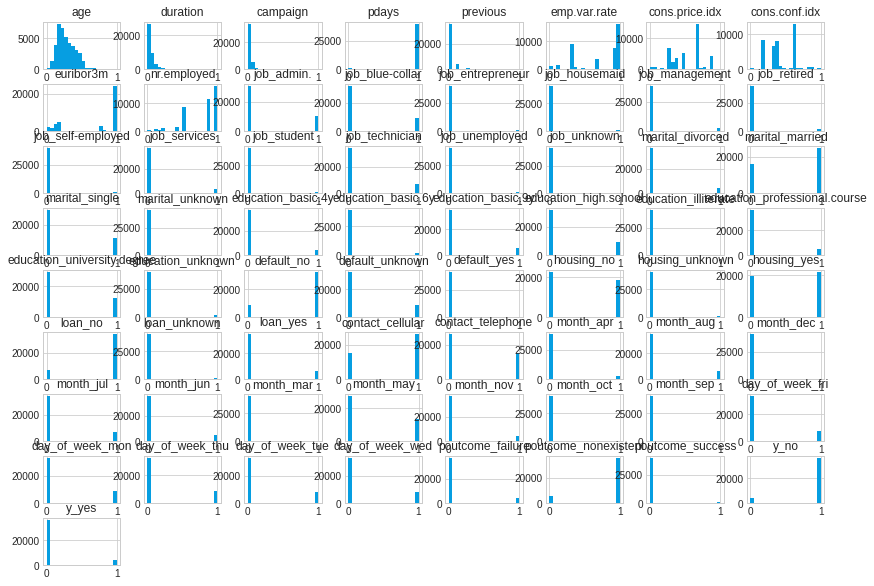

In [ ]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

In [ ]:
#Outliers Removal
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data2 = data[~((data > (Q1 - 1.5 * IQR)) |(data < (Q3 + 1.5 * IQR))).any(axis=1)]
#data2 = data[~((data < (Q1)) |(data > (Q3))).any(axis=1)]

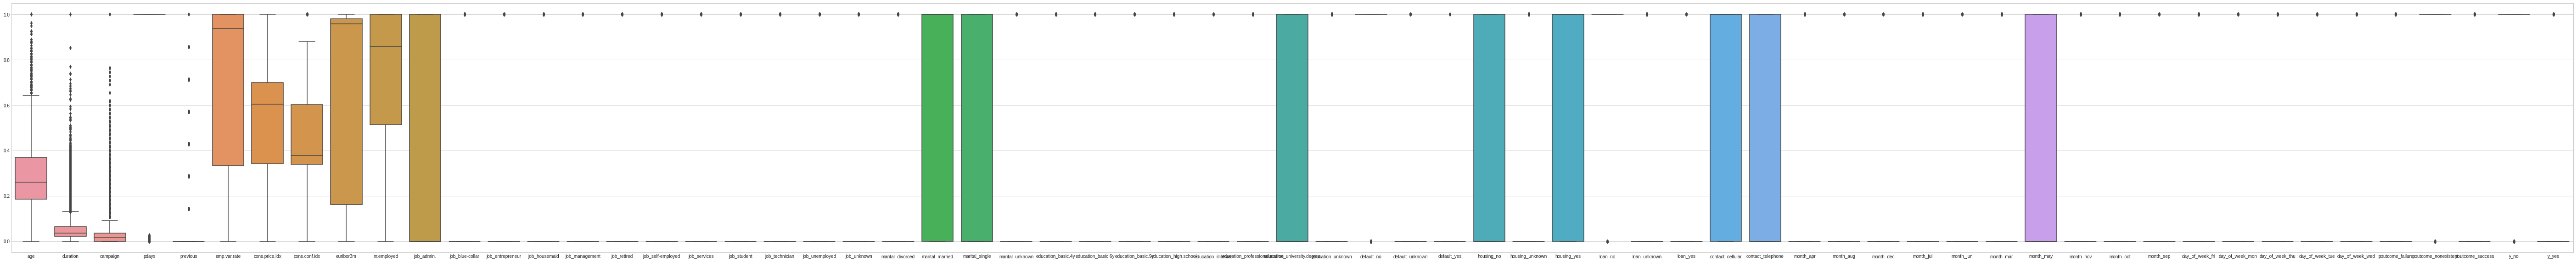

In [ ]:

#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(100,10))
sns.boxplot(data=data)

In [ ]:
data2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see lot of outliers in the columns from above, We need to remove the outliers. 

In [ ]:
#checking the correlation between all the features in the data
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
age,1.000000,-0.000878,0.004651,-0.034400,0.024397,-0.000204,0.001111,0.129067,0.010875,-0.017611,...,0.011991,0.020627,-0.025029,0.019130,-0.026308,-0.012958,-0.005851,0.033175,-0.037232,0.037232
duration,-0.000878,1.000000,-0.071745,-0.047572,0.020610,-0.028051,0.005224,-0.008026,-0.032955,-0.044786,...,-0.010855,-0.021587,0.013409,0.006926,0.012039,0.010257,-0.023255,0.027109,-0.025964,0.025964
campaign,0.004651,-0.071745,1.000000,0.052619,-0.079216,0.150785,0.127797,-0.013618,0.135171,0.144137,...,0.025543,0.009348,0.005136,-0.020507,-0.019454,-0.060270,0.076639,-0.044457,0.051008,-0.051008
pdays,-0.034400,-0.047572,0.052619,1.000000,-0.587530,0.271122,0.078951,-0.091406,0.296993,0.372714,...,0.017674,-0.004376,-0.011392,-0.009568,0.008226,-0.102387,0.211508,-0.231137,0.199334,-0.199334
previous,0.024397,0.020610,-0.079216,-0.587530,1.000000,-0.420639,-0.203213,-0.050862,-0.454598,-0.501459,...,0.004924,-0.000111,0.003530,0.000964,-0.009306,0.198429,-0.294998,0.228040,-0.197789,0.197789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
poutcome_failure,-0.012958,0.010257,-0.060270,-0.102387,0.198429,-0.381731,-0.297156,-0.163009,-0.385567,-0.350106,...,0.019295,-0.001179,-0.004498,-0.006026,-0.007206,1.000000,-0.853114,-0.063026,-0.031794,0.031794
poutcome_nonexistent,-0.005851,-0.023255,0.076639,0.211508,-0.294998,0.472294,0.303272,0.100952,0.488447,0.493382,...,-0.009895,0.002238,-0.000644,0.001534,0.006603,-0.853114,1.000000,-0.466920,0.193522,-0.193522
poutcome_success,0.033175,0.027109,-0.044457,-0.231137,0.228040,-0.256475,-0.076438,0.083254,-0.280882,-0.350468,...,-0.013776,-0.002281,0.008857,0.007279,-0.000416,-0.063026,-0.466920,1.000000,-0.316302,0.316302
y_no,-0.037232,-0.025964,0.051008,0.199334,-0.197789,0.297894,0.135623,-0.053980,0.307715,0.354614,...,0.006989,0.021241,-0.013797,-0.008123,-0.006290,-0.031794,0.193522,-0.316302,1.000000,-1.000000


In [ ]:
data.corr()["y_yes"].sort_values(ascending=False)

y_yes               1.000000
poutcome_success    0.316302
previous            0.197789
contact_cellular    0.144774
month_mar           0.144027
                      ...   
pdays              -0.199334
emp.var.rate       -0.297894
euribor3m          -0.307715
nr.employed        -0.354614
y_no               -1.000000
Name: y_yes, Length: 65, dtype: float64

In [ ]:
data.corr()["y_no"].sort_values(ascending=False)

y_no                1.000000
nr.employed         0.354614
euribor3m           0.307715
emp.var.rate        0.297894
pdays               0.199334
                      ...   
month_mar          -0.144027
contact_cellular   -0.144774
previous           -0.197789
poutcome_success   -0.316302
y_yes              -1.000000
Name: y_no, Length: 65, dtype: float64

In [ ]:
data.corr().unstack().sort_values().drop_duplicates()

contact_telephone  contact_cellular   -1.000000
y_no               y_yes              -1.000000
default_no         default_unknown    -0.999780
housing_yes        housing_no         -0.952805
loan_yes           loan_no            -0.915836
                                         ...   
cons.price.idx     emp.var.rate        0.775253
emp.var.rate       nr.employed         0.906929
nr.employed        euribor3m           0.945137
euribor3m          emp.var.rate        0.972243
age                age                 1.000000
Length: 2017, dtype: float64

In [ ]:
def corrFilter(bound: float):
    xCorr = data.corr()
    data_corr_Filtered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    data_corr_Flattened = data_corr_Filtered.unstack().sort_values().drop_duplicates()
    return data_corr_Flattened
corrFilter(0.5)

contact_telephone     contact_cellular    -1.000000
y_yes                 y_no                -1.000000
default_unknown       default_no          -0.999780
housing_yes           housing_no          -0.952805
loan_yes              loan_no             -0.915836
poutcome_nonexistent  poutcome_failure    -0.853114
marital_single        marital_married     -0.773766
contact_cellular      cons.price.idx      -0.591350
pdays                 previous            -0.587530
nr.employed           previous            -0.501459
                      cons.price.idx       0.521856
cons.price.idx        contact_telephone    0.591350
euribor3m             cons.price.idx       0.688129
emp.var.rate          cons.price.idx       0.775253
                      nr.employed          0.906929
euribor3m             nr.employed          0.945137
                      emp.var.rate         0.972243
age                   age                       NaN
dtype: float64

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
count,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,...,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,0.284234,0.052523,0.028510,0.963418,0.024720,0.725408,0.535766,0.430832,0.677238,0.769126,...,0.190062,0.206722,0.209297,0.196377,0.197542,0.103264,0.863391,0.033345,0.887337,0.112663
std,0.128657,0.052723,0.050376,0.187150,0.070716,0.327251,0.225580,0.193620,0.393205,0.273161,...,0.392355,0.404960,0.406812,0.397261,0.398150,0.304307,0.343438,0.179537,0.316184,0.316184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.020740,0.000000,1.000000,0.000000,0.333333,0.340608,0.338912,0.160961,0.512287,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.259259,0.036600,0.018182,1.000000,0.000000,0.937500,0.603274,0.376569,0.957379,0.859735,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.370370,0.064864,0.036364,1.000000,0.000000,1.000000,0.698753,0.602510,0.980957,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.replace([np.inf, -np.inf], np.nan)

data.dropna(inplace=True)

In [ ]:
# Create feature and target variable for Classification problem
X_clf=data.iloc[:,0:63] # features: SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'
y_clf=data.iloc[:,63] # Target variable: Iris species

In [ ]:
# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [ ]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
from sklearn.feature_selection import SelectKBest, f_classif
#X_clf_new = SelectKBest(score_func=chi2,k=10).fit_transform(X_clf,y_clf)
# Create and fit selector
selector = SelectKBest(f_classif, k=5)
selector.fit(X_clf, y_clf)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X_clf.iloc[:,cols]

In [ ]:
print(features_df_new)

       pdays  emp.var.rate  euribor3m  nr.employed  poutcome_success
0        1.0      0.937500   0.957379     0.859735                 0
1        1.0      0.937500   0.957379     0.859735                 0
2        1.0      0.937500   0.957379     0.859735                 0
3        1.0      0.937500   0.957379     0.859735                 0
4        1.0      0.937500   0.957379     0.859735                 0
...      ...           ...        ...          ...               ...
41171    1.0      0.479167   0.089322     0.000000                 0
41172    1.0      0.479167   0.089322     0.000000                 0
41173    1.0      0.479167   0.089322     0.000000                 0
41174    1.0      0.479167   0.089322     0.000000                 1
41175    1.0      0.479167   0.089322     0.000000                 0

[41164 rows x 5 columns]


In [ ]:
# Check the newly created variable for top two best features
#print(X_clf_new[:5])

In [ ]:
# Compare the newly created values with feature set values to know the selected features
#print(X_clf.head())

In [ ]:
drop_list = ['job_admin.','job_blue-collar','job_entrepreneur','job_housemaid',
             'job_management','job_retired','job_self-employed','job_services',
             'job_student','job_technician','job_unemployed','job_unknown',
             'education_basic.4y','education_basic.6y','education_basic.9y',
            'education_high.school','education_illiterate','education_professional.course'
,'education_university.degree','education_unknown','month_apr','month_aug','month_dec','month_jul',
 'month_jun','month_mar','month_may','month_nov','month_oct','month_sep','contact_cellular'
,'contact_telephone','day_of_week_fri','day_of_week_mon','day_of_week_thu','day_of_week_tue',
'day_of_week_wed','marital_divorced','marital_married','marital_single','marital_unknown','default_unknown',
'housing_unknown','loan_unknown','poutcome_nonexistent','default_no','default_yes','housing_no','housing_yes','loan_no','loan_yes','poutcome_failure']
X_clf_data = X_clf[drop_list]
X_clf.drop(drop_list,axis=1,inplace=True)

In [ ]:
X_clf.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,poutcome_success
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0


Feature: 0, Score: 0.01864
Feature: 1, Score: 0.00716
Feature: 2, Score: 0.00461
Feature: 3, Score: 0.00441
Feature: 4, Score: 0.00698
Feature: 5, Score: 0.13744
Feature: 6, Score: 0.06431
Feature: 7, Score: 0.02705
Feature: 8, Score: 0.04324
Feature: 9, Score: 0.00979
Feature: 10, Score: 0.01262


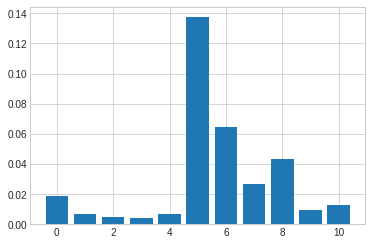

In [ ]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X_clf, y_clf)
# perform permutation importance
results = permutation_importance(model, X_clf, y_clf, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importanceimportances = list(zip(xgb_classifier.feature_importances_, df.columns))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
print(data.columns.values)

['age' 'duration' 'campaign' 'pdays' 'previous' 'emp.var.rate'
 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed' 'job_admin.'
 'job_blue-collar' 'job_entrepreneur' 'job_housemaid' 'job_management'
 'job_retired' 'job_self-employed' 'job_services' 'job_student'
 'job_technician' 'job_unemployed' 'job_unknown' 'marital_divorced'
 'marital_married' 'marital_single' 'marital_unknown' 'education_basic.4y'
 'education_basic.6y' 'education_basic.9y' 'education_high.school'
 'education_illiterate' 'education_professional.course'
 'education_university.degree' 'education_unknown' 'default_no'
 'default_unknown' 'default_yes' 'housing_no' 'housing_unknown'
 'housing_yes' 'loan_no' 'loan_unknown' 'loan_yes' 'contact_cellular'
 'contact_telephone' 'month_apr' 'month_aug' 'month_dec' 'month_jul'
 'month_jun' 'month_mar' 'month_may' 'month_nov' 'month_oct' 'month_sep'
 'day_of_week_fri' 'day_of_week_mon' 'day_of_week_thu' 'day_of_week_tue'
 'day_of_week_wed' 'poutcome_failure' 'poutcome_no

In [ ]:
drop_list = ['job_admin.','job_blue-collar','job_entrepreneur','job_housemaid',
             'job_management','job_retired','job_self-employed','job_services',
             'job_student','job_technician','job_unemployed','job_unknown',
             'education_basic.4y','education_basic.6y','education_basic.9y',
            'education_high.school','education_illiterate','education_professional.course'
,'education_university.degree','education_unknown','month_apr','month_aug','month_dec','month_jul',
 'month_jun','month_mar','month_may','month_nov','month_oct','month_sep','contact_cellular'
,'contact_telephone','day_of_week_fri','day_of_week_mon','day_of_week_thu','day_of_week_tue',
'day_of_week_wed','marital_divorced','marital_married','marital_single','marital_unknown','default_unknown',
'housing_unknown','loan_unknown','poutcome_nonexistent']
drop_data = data[drop_list]
data.drop(drop_list,axis=1,inplace=True)

In [ ]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_success,y_no,y_yes
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,1,0,1,0,1,0,0,0,1,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,1,0,1,0,0,0,1,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,1,0,0,1,1,0,0,0,1,0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,1,0,1,0,1,0,0,0,1,0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,1,0,1,0,0,1,0,0,1,0


In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_success,y_no,y_yes
count,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000
mean,0.284234,0.052523,0.028510,0.963418,0.024720,0.725408,0.535766,0.430832,0.677238,0.769126,0.791104,0.000073,0.452118,0.523832,0.824191,0.151759,0.103270,0.033306,0.887402,0.112598
std,0.128657,0.052723,0.050376,0.187150,0.070716,0.327251,0.225580,0.193620,0.393205,0.273161,0.406525,0.008537,0.497708,0.499438,0.380662,0.358791,0.304315,0.179436,0.316105,0.316105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.020740,0.000000,1.000000,0.000000,0.333333,0.340608,0.338912,0.160961,0.512287,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.259259,0.036600,0.018182,1.000000,0.000000,0.937500,0.603274,0.376569,0.957379,0.859735,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.370370,0.064864,0.036364,1.000000,0.000000,1.000000,0.698753,0.602510,0.980957,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In the predictor variables independent of all the other predictor variables?

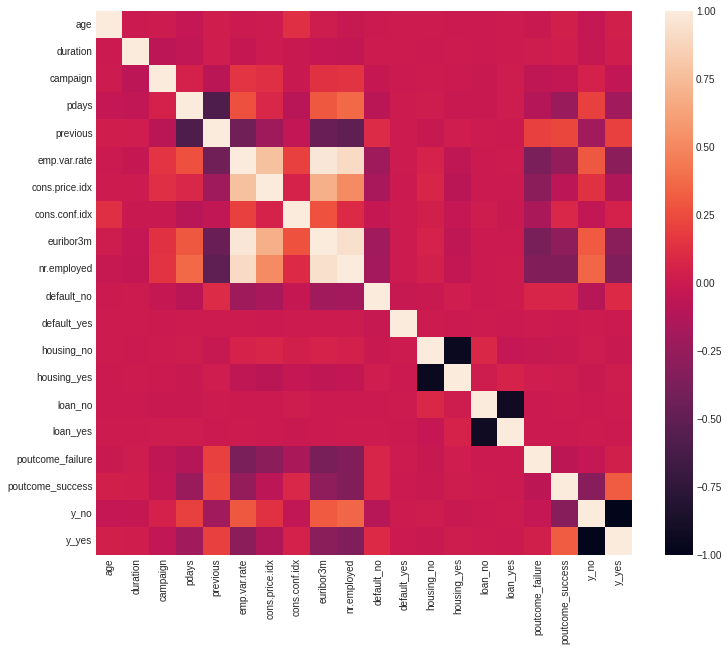

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor)
plt.show()

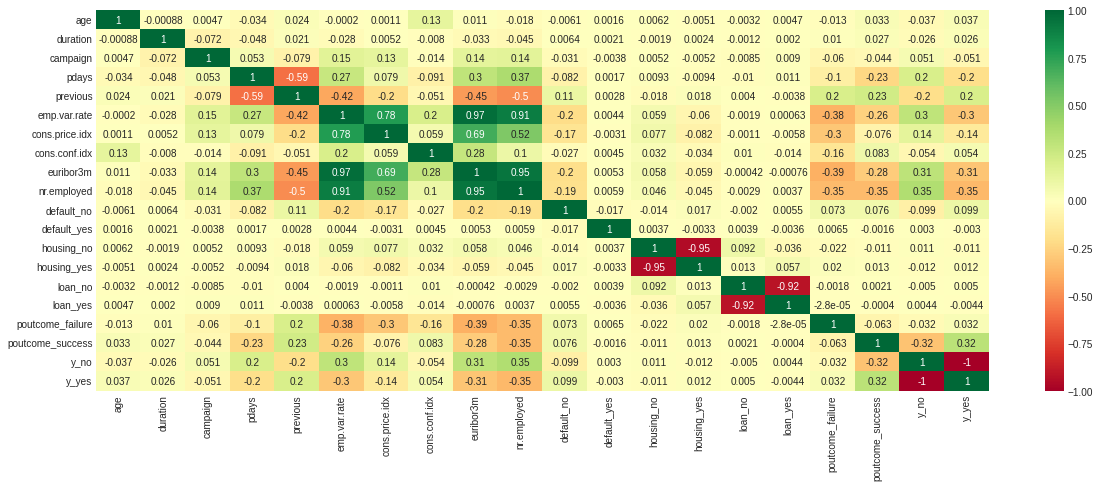

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

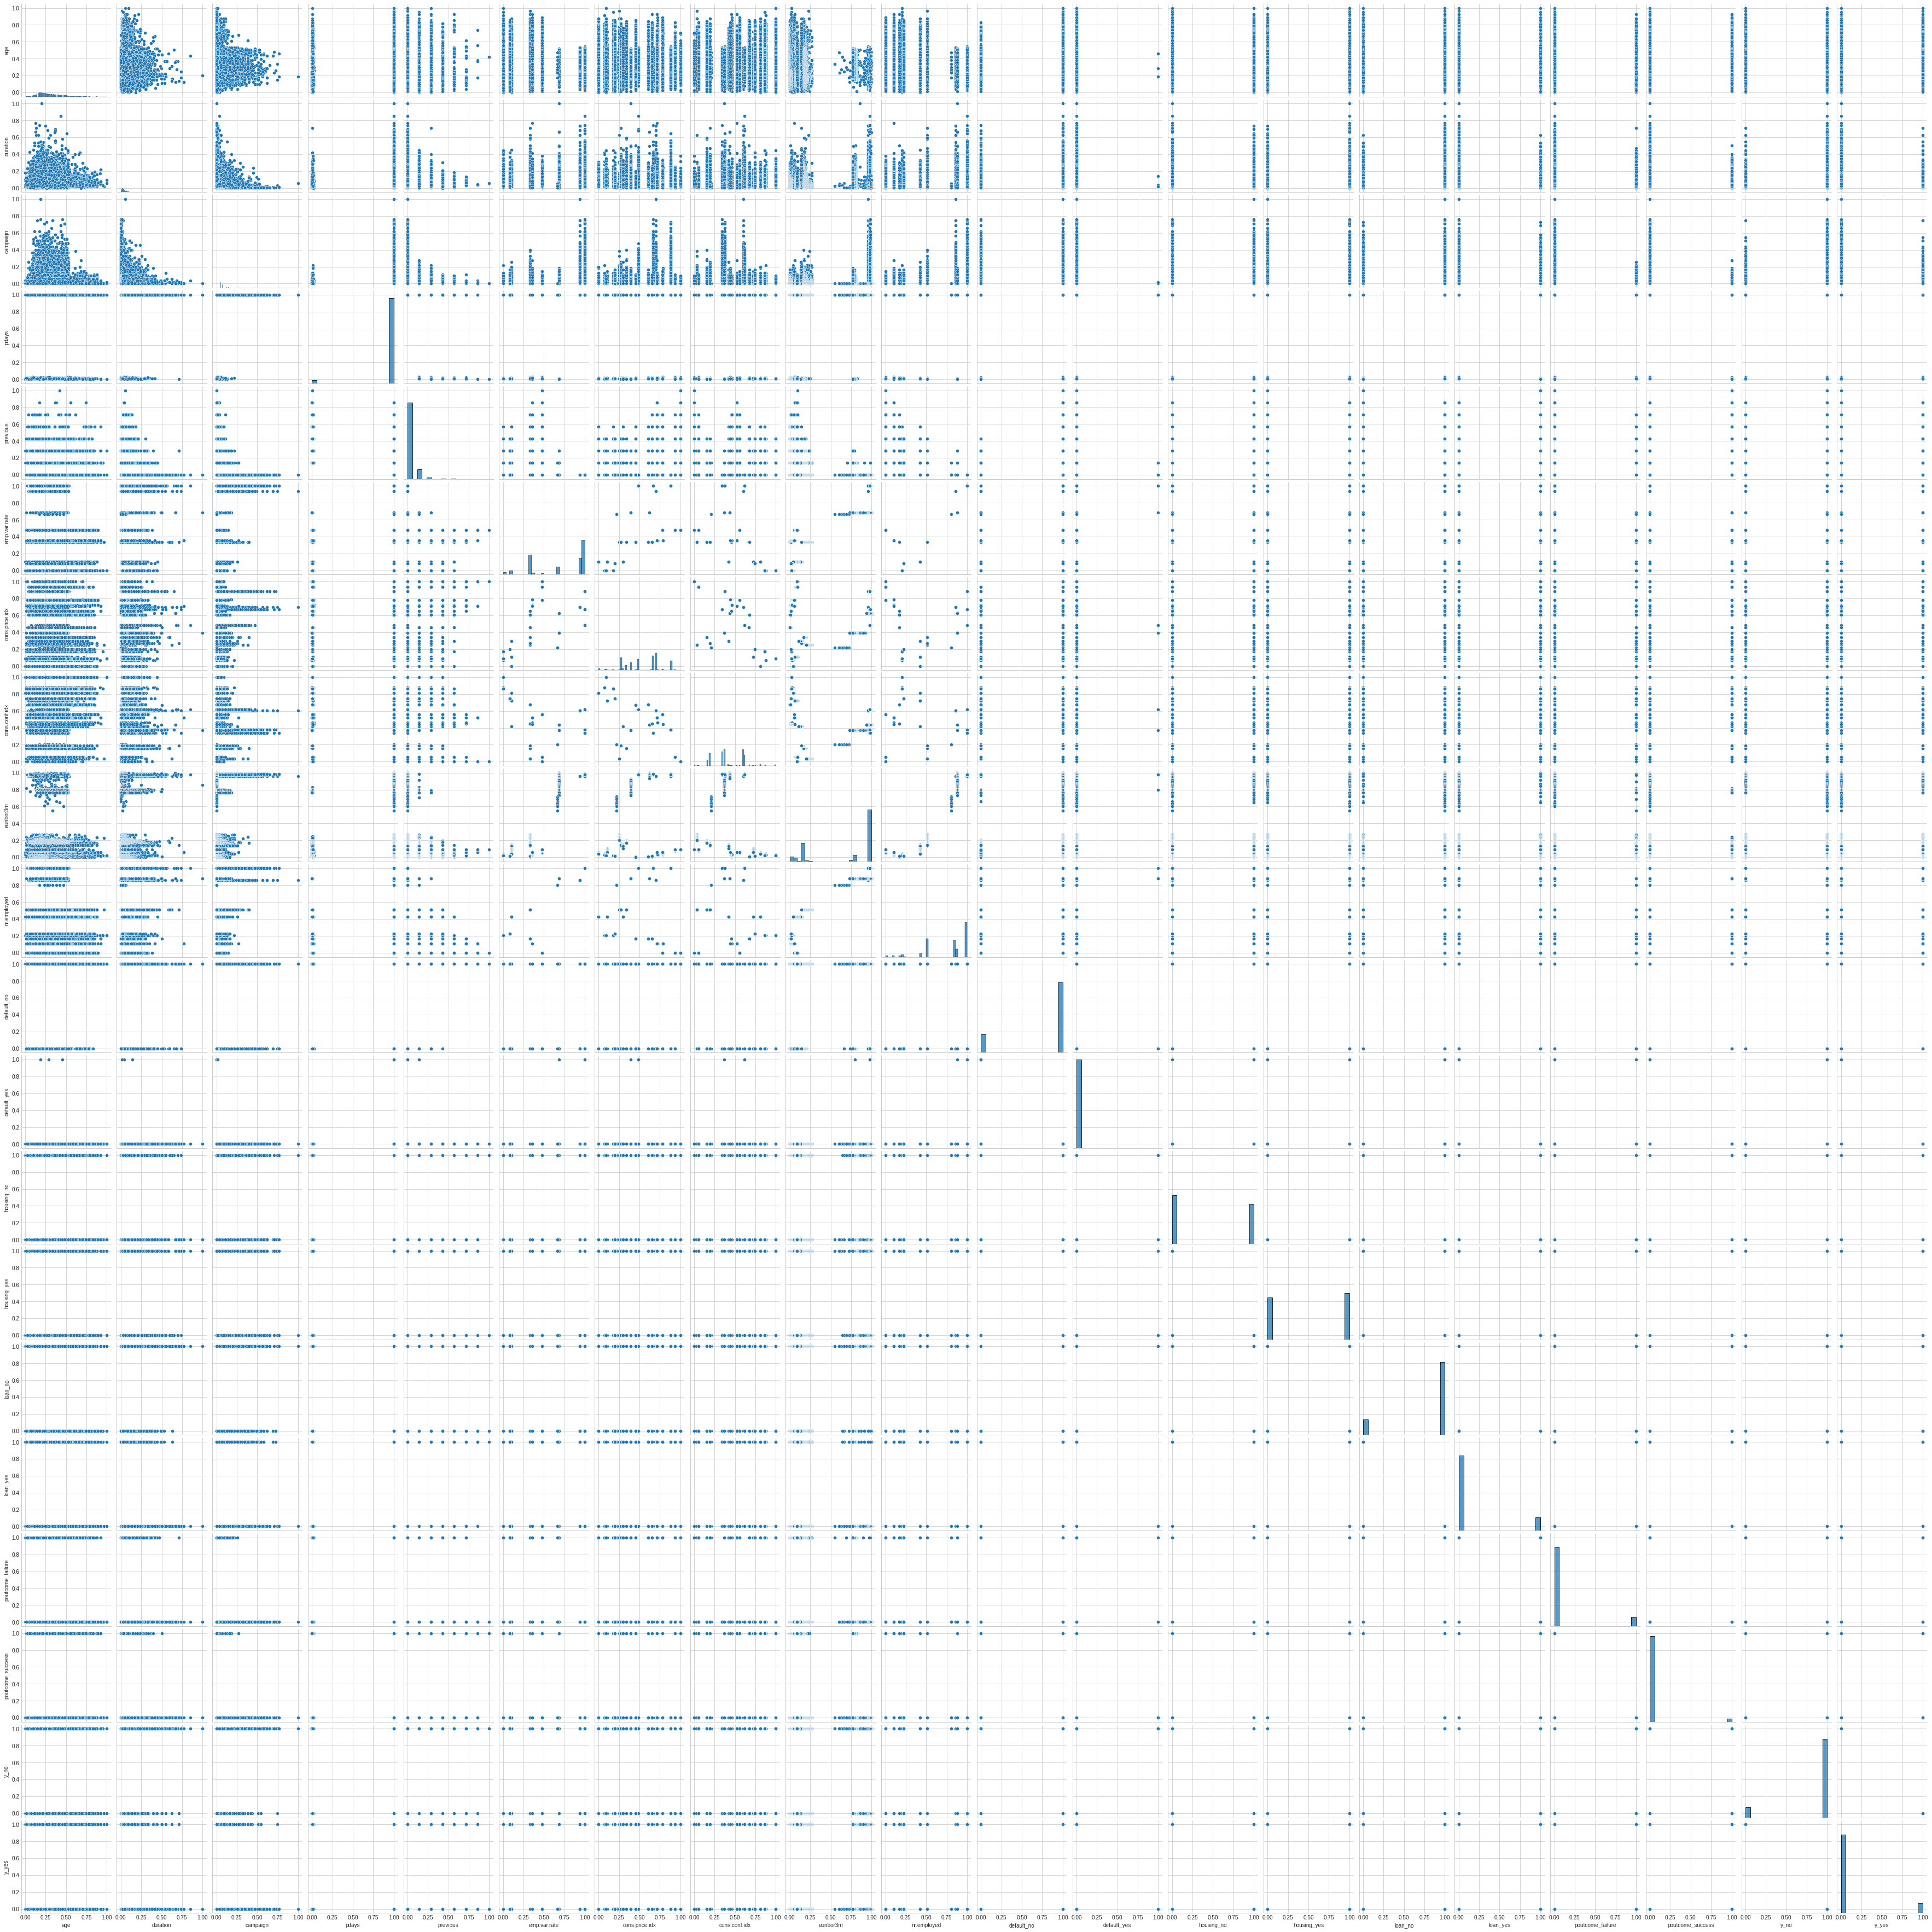

In [ ]:
#pair plot to check the colinearity
sns.pairplot(data) 

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['y_no'], data[['pdays','previous','emp.var.rate'
,'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','default_no'
,'default_yes','housing_no','housing_yes','loan_no','loan_yes']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   y_no   R-squared (uncentered):                 -19.374
Model:                            OLS   Adj. R-squared (uncentered):            -19.380
Method:                 Least Squares   F-statistic:                             -3261.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):                        1.00
Time:                        00:16:35   Log-Likelihood:                         -8293.4
No. Observations:               41164   AIC:                                  1.661e+04
Df Residuals:                   41152   BIC:                                  1.671e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
pdays              0.2367      0.009     26.455      0.000       0.219       0.254
previous           0.3261      0.026     12.607      0.000       0.275       0.377
emp.var.rate       0.1978      0.026      7.740      0.000       0.148       0.248
cons.price.idx     0.0804      0.014      5.872      0.000       0.054       0.107
cons.conf.idx      0.0804      0.009      9.009      0.000       0.063       0.098
euribor3m         -0.5495      0.023    -24.212      0.000      -0.594      -0.505
nr.employed        0.9105      0.022     42.328      0.000       0.868       0.953
default_no        -0.0083      0.004     -2.315      0.021      -0.015      -0.001
default_yes        0.0157      0.171      0.092      0.927      -0.319       0.351
housing_no      -6.43e+10    2.2e+11     -0.292      0.770   -4.96e+11    3.67e+11
housing_yes     -6.43e+10    2.2e+11     -0.292      0.770   -4.96e+11    3.67e+11
loan_no          6.43e+10    2.2e+11      0.292      0.770   -3.67e+11    4.96e+11
loan_yes         6.43e+10    2.2e+11      0.292      0.770   -3.67e+11    4.96e+11
==============================================================================
Omnibus:                    15361.816   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50410.700
Skew:                          -1.950   Prob(JB):                         0.00
Kurtosis:                       6.766   Cond. No.                     6.73e+14
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.52e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
from sklearn.model_selection import  train_test_split

X = data[ ['pdays','previous','emp.var.rate'
,'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','default_no']]

y = data['y_no']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

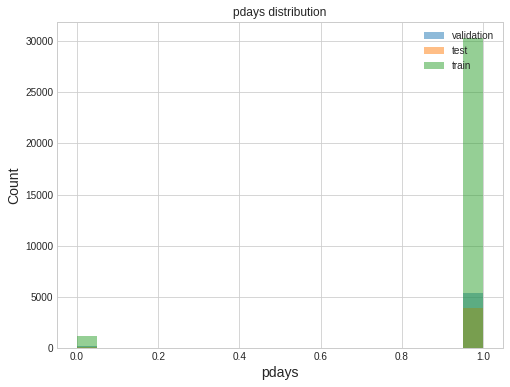

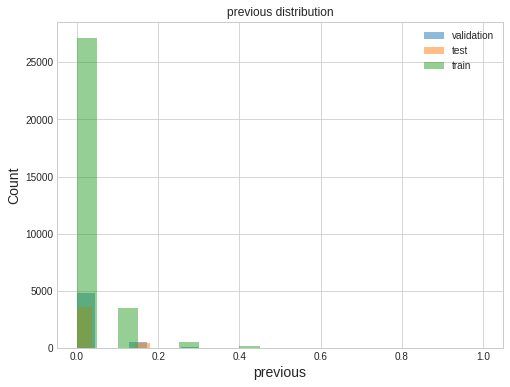

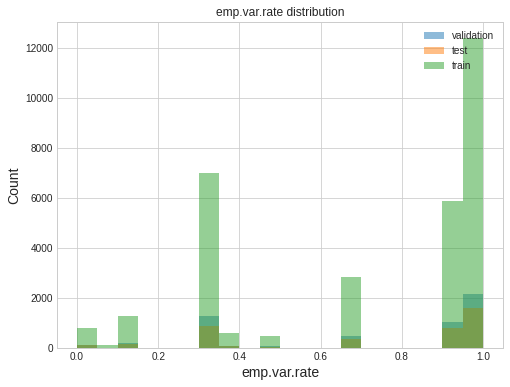

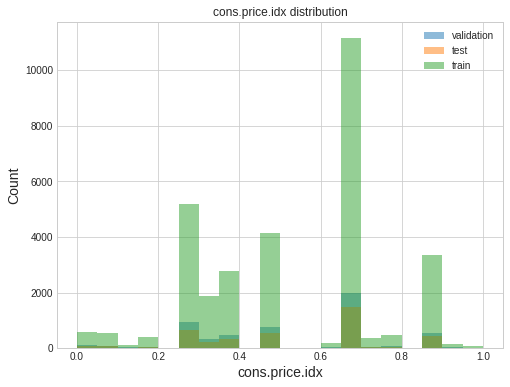

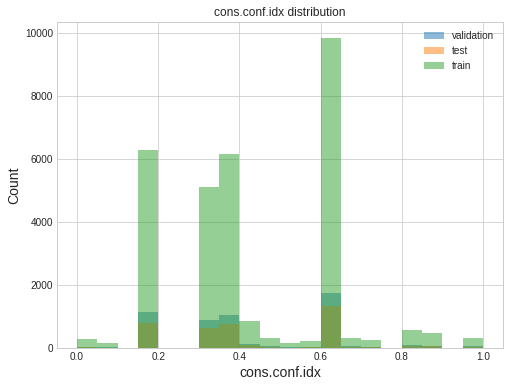

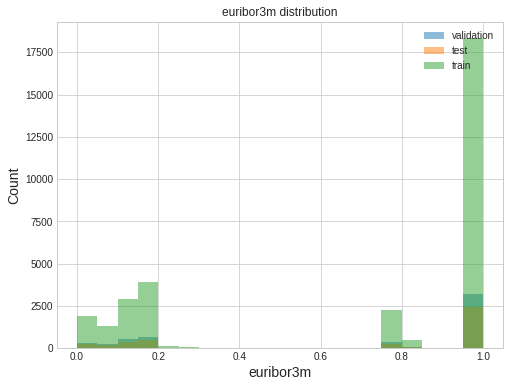

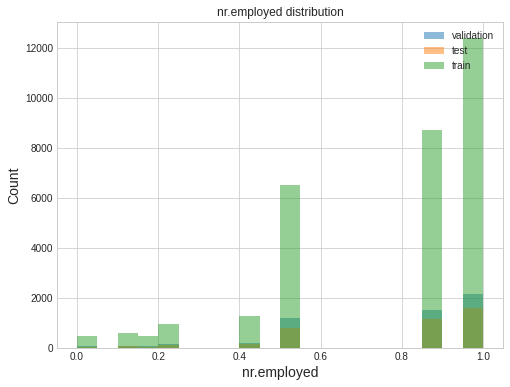

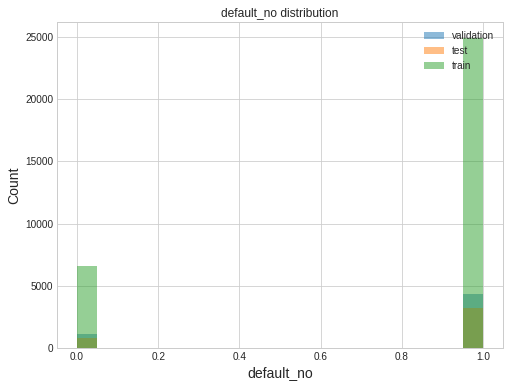

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['pdays','previous','emp.var.rate'
,'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','default_no'
]]

X_val_plot = X_val[['pdays','previous','emp.var.rate'
,'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','default_no'
]]

X_train_plot = X_train[['pdays','previous','emp.var.rate'
,'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','default_no'
]]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)

Mean squared error: 0.09
Coefficient of determination: 0.14
R^2 score on training set = 0.14405931807202121


In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.08
Coefficient of determination: 0.13
R^2 score on test set = 0.13337792813508165


In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.08
Coefficient of determination: 0.14
R^2 score on validation set = 0.13567639345140659


In [ ]:
#installing dependencies
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 23.6 MB/s 
     |████████████████████████████████| 133 kB 47.3 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=4f60ce1c46222fe424832ab4b8ad8ba71562b384e5d0f4575a658d5a1eaa861d
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incomp

In [ ]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1253 ± 0.0181,nr.employed
0.0444 ± 0.0065,cons.price.idx
0.0383 ± 0.0051,emp.var.rate
0.0226 ± 0.0051,cons.conf.idx
0.0052 ± 0.0013,pdays
0.0019 ± 0.0018,default_no
0.0003 ± 0.0006,euribor3m
0.0003 ± 0.0005,previous


In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['y_yes'], data[['pdays','previous','emp.var.rate'
,'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','default_no'
,'default_yes','housing_no','housing_yes','loan_no','loan_yes']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  y_yes   R-squared (uncentered):                -130.543
Model:                            OLS   Adj. R-squared (uncentered):           -130.581
Method:                 Least Squares   F-statistic:                             -3403.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):                        1.00
Time:                        00:16:50   Log-Likelihood:                         -7980.2
No. Observations:               41164   AIC:                                  1.598e+04
Df Residuals:                   41152   BIC:                                  1.609e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
pdays             -0.0296      0.009     -3.329      0.001      -0.047      -0.012
previous           0.1151      0.026      4.485      0.000       0.065       0.165
emp.var.rate      -0.1155      0.025     -4.554      0.000      -0.165      -0.066
cons.price.idx     0.3199      0.014     23.536      0.000       0.293       0.347
cons.conf.idx      0.2977      0.009     33.611      0.000       0.280       0.315
euribor3m         -0.3144      0.023    -13.957      0.000      -0.359      -0.270
nr.employed        0.0345      0.021      1.616      0.106      -0.007       0.076
default_no         0.0410      0.004     11.459      0.000       0.034       0.048
default_yes        0.0042      0.170      0.025      0.980      -0.328       0.337
housing_no       8.17e+10   2.19e+11      0.374      0.708   -3.47e+11     5.1e+11
housing_yes      8.17e+10   2.19e+11      0.374      0.708   -3.47e+11     5.1e+11
loan_no         -8.17e+10   2.19e+11     -0.374      0.708    -5.1e+11    3.47e+11
loan_yes        -8.17e+10   2.19e+11     -0.374      0.708    -5.1e+11    3.47e+11
==============================================================================
Omnibus:                    16196.561   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54432.206
Skew:                           2.063   Prob(JB):                         0.00
Kurtosis:                       6.836   Cond. No.                     6.73e+14
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.52e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier, LGBMRegressor, early_stopping, Dataset
Lbgm = LGBMClassifier()
model = Lbgm.fit(X_train, y_train)

In [ ]:
y_pred = Lbgm.predict(X_test)

In [ ]:
from sklearn import metrics
accuracy = round(metrics.accuracy_score(y_test, y_pred),5)

In [ ]:
print("Accuracy:", accuracy)
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred)) 

Accuracy: 0.9009
Mean squared error: 0.10
R^2 score on test set = -0.11243004827910519

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.22      0.30       407
           1       0.92      0.98      0.95      3710

    accuracy                           0.90      4117
   macro avg       0.71      0.60      0.62      4117
weighted avg       0.88      0.90      0.88      4117

